## Problem-1

In [1]:
import librosa
from librosa import display
from PIL import Image
from matplotlib import pyplot
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cmath
import seaborn as sns
import scipy
import IPython.display as ipd
from tqdm import tqdm

### Inserting the wave file

In [2]:
y, sr = librosa.load("x.wav",sr=None)

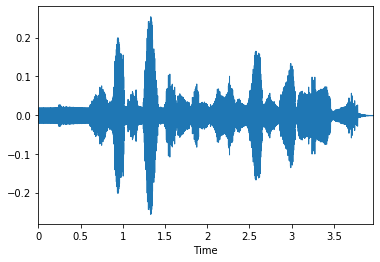

In [3]:
librosa.display.waveplot(y, sr=sr,label="Time Domain")
y=np.array(y,dtype='float64')

In [4]:
window_size=1600
F_matrix = np.zeros((window_size,window_size),dtype=complex)

In [5]:
pi= cmath.pi
w=cmath.exp(-2j*pi/window_size)

### Creating  F Matrix

In [6]:
for i in range(0,window_size):
    for j in range(0,window_size):
        F_matrix[i][j]= pow(w,i*j)

In [7]:
a=0
b=0
data_matrix=[]
hj=0
while b < len(y):
    empty_list=np.zeros(window_size,dtype='float64')
    hanningvalues=np.array(np.hanning(window_size))
    i=0
    for i in range (window_size):
        empty_list[i]=hanningvalues[i]*y[a+i]
    data_matrix.append(empty_list)
    hj=hj+1
    
    a=int(a+(window_size/2))
    b=int(a+window_size)
    

## Plotting the spectogram

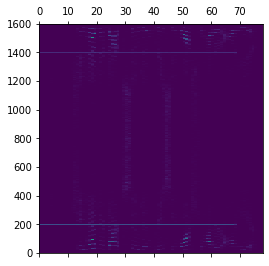

In [8]:
data_matrix1=np.array(data_matrix)
data_matrixfinal=np.transpose(data_matrix1)
FX=np.matmul(F_matrix,data_matrixfinal)
mag=abs(FX)
plt.matshow(mag,extent=[0,mag.shape[1],0,mag.shape[0]], aspect=0.05)

In [9]:
rows_zeros=[199,200,201,202,1399,1400,1401,1402]

In [10]:
mag[rows_zeros]=0
FX[rows_zeros]=0

In [11]:
Finverse_matrix = np.zeros((window_size,window_size),dtype=complex)
pi= cmath.pi
w1=cmath.exp(2j*pi/window_size)
for i in range(0,window_size):
    for j in range(0,window_size):
        Finverse_matrix[i][j]= 1/window_size*(pow(w1,i*j))

### Checking whether Finverse_matrix and F_matrix is Identity

In [12]:
np.matmul(Finverse_matrix,F_matrix)

array([[1.00000000e+00+0.00000000e+00j, 2.63677968e-16-2.86081922e-14j,
        6.24500451e-17-2.83315038e-14j, ...,
        6.45108966e-14+1.50520880e-11j, 4.93841079e-14+2.25883565e-11j,
        9.36750677e-15+4.52055251e-11j],
       [2.42861287e-16+2.85656915e-14j, 1.00000000e+00+3.46944695e-18j,
        4.64905892e-16-8.49624190e-14j, ...,
        7.28861416e-14+1.12959087e-11j, 6.32965902e-14+1.50683060e-11j,
        4.86208296e-14+2.26161728e-11j],
       [1.24900090e-16+2.83731372e-14j, 4.64905892e-16+8.49485413e-14j,
        1.00000000e+00-1.38777878e-17j, ...,
        7.65186525e-14+9.03793013e-12j, 6.88823998e-14+1.13072225e-11j,
        6.31231178e-14+1.50876638e-11j],
       ...,
       [6.45247744e-14-1.50520880e-11j, 7.28930805e-14-1.12958948e-11j,
        7.64978358e-14-9.03796482e-12j, ...,
        1.00000000e+00+3.46944695e-18j, 1.75387482e-13-9.03277748e-11j,
        1.77996506e-13-4.51814541e-11j],
       [4.93147190e-14-2.25882767e-11j, 6.31647512e-14-1.50683598e-1

In [13]:
cd=(np.matmul(Finverse_matrix,FX).real)

In [14]:
X_transpose=np.transpose(cd)
print(X_transpose.shape)

(78, 1600)


In [15]:
for i in range(1,len(X_transpose),1):
    for j in range(800):
        X_transpose[i][j]=X_transpose[i][j]+X_transpose[i-1][j+800]            

In [16]:
fgfh=np.array(X_transpose[0:77,0:800])
ghj= np.array(X_transpose[77,800:1600],dtype='float64')

In [17]:
fghjja=np.array(fgfh.flatten(),dtype='float64')

In [18]:
gh1=list(fghjja)

In [19]:
gh2=list(ghj)

In [20]:
gh3=gh1+gh2
gh4=np.array(gh3,dtype='float64')
print(gh4)

[5.28312991e-06 7.12161640e-06 4.79003547e-06 ... 2.44735359e-06
 1.83277481e-06 1.25747642e-07]


In [21]:
ipd.Audio(gh4, rate=16000)

## Problem 2

In [22]:
import numpy as np
import random 
from scipy.io import loadmat
decmat=loadmat('december.mat')
dec_matfinal= decmat['december']
junemat=loadmat('june.mat')
june_matfinal= junemat['june']

In [23]:
dec_xcoordinate=dec_matfinal[:,0]
june_xcoordinate=june_matfinal[:,0]
disparity=np.array(dec_xcoordinate-june_xcoordinate,dtype='float64')

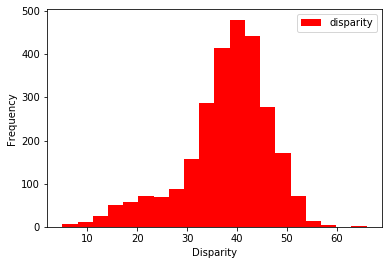

In [24]:
plt.hist( disparity,bins=20,label='disparity',color='red')
plt.ylabel('Frequency')
plt.xlabel('Disparity')
plt.legend()

In [25]:
def dot(K,L):
    if len(K)==len(L) and len(K)!=0:
        return [K[n]*L[n] for n in range(len(K))]
    else:
        return 0
def dot1(K,L):
    if len(K)==len(L) and len(K)!=0:
        return sum([K[n]*L[n] for n in range(len(K))])
    else:
        return 0

In [26]:
def K_means(disparity):
    thetaold= np.array([disparity[0],disparity[1]],dtype='float64')
    disparity_in_column=np.array([[i] for i in disparity],dtype='float64')
    disparity_in_row=np.transpose(disparity_in_column)
    theta_new=[0,0]
    for kl in tqdm(range(10000)):
        U_matrix=np.zeros((len(disparity),2),dtype='float64')
        for i in range (len(disparity)):
            gh1=(disparity[i]-thetaold[0])**2
            gh2=(disparity[i]-thetaold[1])**2
            list1=[gh1,gh2]
            j=np.argmin(np.array(list1))
            U_matrix[i][j]=1
        final_c=np.matmul(disparity_in_row,U_matrix)

        U_columnsum=[sum([row[i] for row in U_matrix]) for i in range(0,len(U_matrix[0]))]
        theta_new[0]=final_c[0][0]/U_columnsum[0]
        theta_new[1]=final_c[0][1]/U_columnsum[1]
        if max(abs(theta_new-thetaold))<0.0000001:
            break
        else:
            thetaold[0]= theta_new[0]
            thetaold[1]= theta_new[1]
    return(thetaold,U_matrix)
    

In [27]:
K_mean_result= K_means(disparity)
# U_columnsum=[sum([row[i] for row in K_mean_result[1]]) for i in range(0,len(K_mean_result[1][0]))]
disparity_in_column=np.array([[i] for i in disparity],dtype='float64')
disparity_in_row=np.transpose(disparity_in_column)
# final_c=np.array(dot(disparity,K_mean_result[1][:,0]),dtype='float64')
# final_c1=list(filter((float(0)).__ne__, final_c))
# df=np.array([K_mean_result[0][0]]*len(final_c1),dtype='float64')
# df1=(final_c1-df)**2
# var1=sum(df1)/U_columnsum[0]

# var2=np.array(dot(disparity,K_mean_result[1][:,1]),dtype='float64')
# var21=list(filter((float(0)).__ne__, var2))
# var31=np.array([K_mean_result[0][1]]*len(var21),dtype='float64')
# df11=(var21-var31)**2
# var11=sum(df11)/U_columnsum[1]

# print(var1,var11)

  0%|          | 5/10000 [00:00<04:52, 34.20it/s]


In [28]:
print("The mean corresponding to the stars in the far away galaxy:", K_mean_result[0][0])
print("The mean corresponding to the stars in the same galaxy:", K_mean_result[0][1])

The mean corresponding to the stars in the far away galaxy: 27.74271844660194
The mean corresponding to the stars in the same galaxy: 42.31183368869936


The mean 24.35 corresponds to the stars in the far away galaxy. Since, the movement will be less corresponding to the stars in the same galaxy.Therefore, the disparity mean ,i.e the mean of the difference between the x_coordinate in june and december will be less for the stars far away compared to the stars in the same Galaxy

## Problem 3

### Initializing the parameters

In [29]:
import math
from scipy.stats import norm
mean1=np.array([K_mean_result[0][0],K_mean_result[0][1]],dtype='float64')
initial_variance=np.array([35,35],dtype='float64')
initial_probabilities=np.array([0.19,0.81],dtype='float64')
mu_new=[0,0]
probnew=[0,0]
variance_new=[0,0]

In [30]:
def dot(K,L):
    if len(K)==len(L) and len(K)!=0:
        return sum([K[n]*L[n] for n in range(len(K))])
    else:
        return 0

In [31]:
for kl1 in tqdm(range(10000)):
    EM_U_Matrix=np.zeros((len(disparity),2),dtype='float64')
    for i in range (len(disparity)):
        for j in range(2):
            a=initial_probabilities[0]*norm.pdf(disparity[i],mean1[0],math.sqrt(initial_variance[0]))
            b=initial_probabilities[1]*norm.pdf(disparity[i],mean1[1],math.sqrt(initial_variance[1]))
            if j==0:
                EM_U_Matrix[i][j]=a/(a+b)
            else:
                EM_U_Matrix[i][j]=b/(a+b)
    mu=np.matmul(disparity_in_row,EM_U_Matrix)
    EM_U_columnsum=[sum([row[j] for row in EM_U_Matrix]) for j in range(0,len(EM_U_Matrix[0]))]
    mu_new[0]=mu[0][0]/EM_U_columnsum[0]
    mu_new[1]=mu[0][1]/EM_U_columnsum[1]
    probnew[0]=EM_U_columnsum[0]/len(disparity)
    probnew[1]=EM_U_columnsum[1]/len(disparity)
    cluster_1= (disparity-[mu_new[0]]*(len(disparity)))**2
    cluster_2= (disparity-[mu_new[1]]*(len(disparity)))**2
    variance_new[0]=dot(cluster_1,EM_U_Matrix[:,0])/EM_U_columnsum[0]
    variance_new[1]=dot(cluster_2,EM_U_Matrix[:,1])/EM_U_columnsum[1]
    
    if max(abs(mu_new-mean1))<0.00000001:
        print("I hate you")
        break
    else:
        mean1[0]= mu_new[0]
        mean1[1]= mu_new[1]
        initial_probabilities[0]=probnew[0]
        initial_probabilities[1]=probnew[1]
        initial_variance[0]=variance_new[0]
        initial_variance[1]=variance_new[1]   

  2%|▏         | 241/10000 [04:24<2:52:16,  1.06s/it]

I hate you


In [32]:
print("After GMM the reported mean is:",mu_new)
print("After GMM the reported prior weight is:",probnew)
print("After GMM the reported variance is:",variance_new)

After GMM the reported mean is: [20.843233947173143, 40.15282868466281]
After GMM the reported prior weight is: [0.1184526739272151, 0.8815473260727709]
After GMM the reported variance is: [34.45937089828657, 34.141835144631216]


GMM performs better than K-means for the following reasons because K-means assumes the following assumptions  Euclidean distance, hard decision, equiprobable clusters, diagonal covariance.

## Problem 4

In [33]:
from PIL import Image
from matplotlib import pyplot
from numpy import asarray
import matplotlib.pyplot as plt

In [34]:
image1 = Image.open('IMG_1878.JPG')

In [35]:
Image= asarray(image1)
X_red=np.zeros((1024,768),dtype='float64')
X_blue=np.zeros((1024,768),dtype='float64')
X_green=np.zeros((1024,768),dtype='float64')

In [36]:
for i in range (1024):
    for j in range (768):
        for k in range (3):
            if k ==0:
                X_red[i][j]=Image[i][j][k]
            if k ==1:
                X_green[i][j]=Image[i][j][k]
            if k ==2:
                X_blue[i][j]=Image[i][j][k] 

In [37]:
def randomsampling(matrix,n):
    a=random.randint(0,len(matrix)-8)
    matrix1=matrix[a:a+8]
    for j in range(n-1):
        a= random.randint(0,len(matrix)-8)
        b=np.array(matrix[a:a+8])
        matrix1=np.hstack((b,matrix1))
    return(matrix1)

In [38]:
red_matrix_9= randomsampling(X_red,3)
green_matrix_9=randomsampling(X_green,3)
blue_matrix_9=randomsampling(X_blue,3)
final_matrix_9=np.hstack((red_matrix_9,green_matrix_9,blue_matrix_9))
mean_final_matrix_9=np.mean(final_matrix_9)
final_matrix_after_mean_9=final_matrix_9-mean_final_matrix_9

In [39]:
Covariance_9=np.matmul(final_matrix_after_mean_9,np.transpose(final_matrix_after_mean_9))/len(final_matrix_after_mean_9[0])

## Finding the eigenvalues for Block 9

In [40]:
eigenvalues,eigenvectors_9=np.linalg.eig(Covariance_9)
eigenvectors_9_transpose=np.transpose(eigenvectors_9)

### Plot for 9 blocks

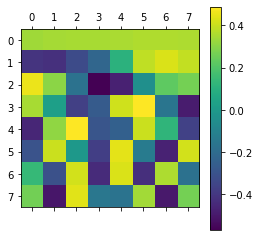

In [41]:
plt.matshow(eigenvectors_9_transpose)
plt.colorbar()

### For 90 blocks

In [42]:
red_matrix_90= randomsampling(X_red,30)
green_matrix_90=randomsampling(X_green,30)
blue_matrix_90=randomsampling(X_blue,30)
final_matrix_90=np.hstack((red_matrix_90,green_matrix_90,blue_matrix_90))
mean_final_matrix_90=np.mean(final_matrix_90)
final_matrix_after_mean_90=final_matrix_90-mean_final_matrix_90

In [43]:
Covariance_90=np.matmul(final_matrix_after_mean_90,np.transpose(final_matrix_after_mean_90))/len(final_matrix_after_mean_90[0])

## Finding the eigenvalues for Block 90

In [44]:
eigenvalues,eigenvectors_90=np.linalg.eig(Covariance_90)
eigenvectors_90_transpose=np.transpose(eigenvectors_90)

### Plot for 90 blocks

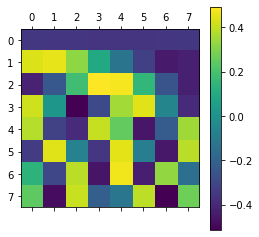

In [45]:
plt.matshow(eigenvectors_90_transpose)
plt.colorbar()